In [75]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Question 1

In [3]:
# Reading the dataset
data = pd.read_csv('/Users/amoolyabagalkoti/Downloads/Keyword_data - Keyword_data.csv')

In [5]:
data

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Subsidiary Staffing in Multinational Enterpris...,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,"Strategic Human Resource Practices, Top Manage...",PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,Compensation Policy and Organizational Perform...,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,"Functional Background Identity, Diversity, and...",CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


# Question 2

In [13]:
# Dropping the rows with nulls
filter_data = data.dropna(axis=0, how = 'all', inplace = False, thresh =2)

In [14]:
filter_data

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


In [15]:
# making a lookup dictionary to assign weights to the adjacency matrix
lookup = filter_data.set_index('Title')
lookup = lookup.T.to_dict('list')

In [16]:
lookup

{'Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?': ['EQUITY',
  'ORGANIZATIONAL sociology',
  'PERFORMANCE',
  'META-analysis',
  'PSYCHOMETRICS',
  'ORGANIZATIONAL research',
  'FINANCIAL performance',
  'AGENCY theory',
  'ORGANIZATIONAL effectiveness',
  'ORGANIZATIONAL behavior',
  'CORPORATE governance',
  nan],
 'Home Country Environments, Corporate Diversification Strategies, and Firm Performance': ['DIVERSIFICATION in industry',
  'BUSINESS planning',
  'PERFORMANCE standards',
  'EMPLOYEES -- Rating of',
  'CORPORATE culture',
  'STRATEGIC planning',
  'ORGANIZATIONAL effectiveness',
  'MANAGEMENT science',
  'MANAGEMENT research',
  'PRODUCT management',
  nan,
  nan],
 'Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence': ['INTERORGANIZATIONAL relations',
  'INTERGROUP relations',
  'BUSINESS communication',
  'INVESTMENTS',
  'SUPPLY chains',
  'KNOWLEDGE management',
  'INTERORGANIZATIONAL networks',
  'CO

In [17]:
keyword_data = filter_data.iloc[:,1:]

In [19]:
keyword_data

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


In [20]:
keyword_data.iloc[0,:]

Keyword 1                           EQUITY
Keyword 2         ORGANIZATIONAL sociology
Keyword 3                      PERFORMANCE
Keyword 4                    META-analysis
Keyword 5                    PSYCHOMETRICS
Keyword 6          ORGANIZATIONAL research
Keyword 7            FINANCIAL performance
Keyword 8                    AGENCY theory
Keyword 9     ORGANIZATIONAL effectiveness
Keyword 10         ORGANIZATIONAL behavior
Keyword 11            CORPORATE governance
Keyword 12                             NaN
Name: 2, dtype: object

In [22]:
# Getting the distinct keywords from the dataset
distinct_keywords = []
for keyword_col in keyword_data:
    for keyword in keyword_data[keyword_col].dropna():
        if keyword not in distinct_keywords: 
            distinct_keywords.append(keyword)

In [24]:
distinct_keywords

['EQUITY',
 'DIVERSIFICATION in industry',
 'INTERORGANIZATIONAL relations',
 'EXECUTIVE compensation',
 'KNOWLEDGE management',
 'EMOTIONS (Psychology)',
 'SUPERVISORS',
 'INDUSTRIAL relations',
 'DECISION making',
 'CORPORATE governance',
 'EXECUTIVES',
 'FAMILY-owned business enterprises',
 'INSTITUTIONAL investors',
 'RESEARCH & development',
 'PROPERTY',
 'STOCK options',
 'MANAGEMENT science',
 'AGGRESSION (Psychology)',
 'CHIEF executive officers',
 'MENTAL fatigue',
 'PERSONNEL management',
 'PRODUCT management',
 'SOCIAL capital (Sociology)',
 'ORGANIZATIONAL behavior',
 'NEW products',
 'LEADERSHIP',
 'TEAMS in the workplace',
 'LABOR supply',
 'EMPLOYEES -- Attitudes',
 'WORK & family',
 'HUMAN capital',
 'SOCIAL status',
 'EMPLOYEE motivation',
 'ORGANIZATIONAL change',
 'CREATIVE ability',
 'GOING public (Securities)',
 'INTERNATIONAL business enterprises -- Management',
 'COMPENSATION management',
 'CROSS-functional teams',
 'SERVICE industries -- Management',
 'ORGANIZAT

In [27]:
# Length of the distinct keywords list
kw_len = len(distinct_keywords)
kw_len

248

In [32]:
# making a matrix with zeros
adj_matrix = np.zeros((kw_len, kw_len), dtype = int)

In [34]:
# adjacency matrix
for i in range(0,kw_len):
    for j in range(0, kw_len):
        if i!=j:
            if (adj_matrix[i][j] == 0) and (adj_matrix[j][i] == 0) :
                for item in lookup.keys():
                    if (distinct_keywords[i] in (lookup[item])) and (distinct_keywords[j] in (lookup[item])):
                        adj_matrix[i][j] = adj_matrix[i][j] + 1
                        adj_matrix[j][i] = adj_matrix[j][i] + 1         

In [36]:
print(adj_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
# adjacency matrix dataframe
row_names = col_names = distinct_keywords
df = pd.DataFrame(adj_matrix, columns=col_names, index=row_names)
df

,EQUITY,DIVERSIFICATION in industry,INTERORGANIZATIONAL relations,EXECUTIVE compensation,KNOWLEDGE management,EMOTIONS (Psychology),SUPERVISORS,INDUSTRIAL relations,DECISION making,CORPORATE governance,...,PROBLEM employees,STRATEGIC business units,SUBSIDIARY corporations -- Management,FINANCIAL management,CUSTOMER orientation,TRANSACTION costs,INNOVATION adoption,WORK attitudes,HOST countries (Business),MARKETING strategy
EQUITY,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DIVERSIFICATION in industry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
INTERORGANIZATIONAL relations,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
EXECUTIVE compensation,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
KNOWLEDGE management,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANSACTION costs,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
INNOVATION adoption,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WORK attitudes,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
HOST countries (Business),0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Question 3

In [45]:
# Converting adjacency matrix into a weighted graph
network = nx.from_numpy_matrix(adj_matrix, parallel_edges=False)

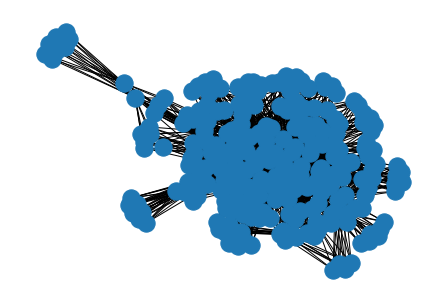

In [47]:
nx.draw(network)

In [49]:
network.number_of_nodes()

248

In [52]:
network.number_of_edges()

2141

# Question 4

In [54]:
# Computing node Degree and Strength
degree = network.degree()
strength = network.degree (weight = 'weight')
strength

DegreeView({0: 10, 1: 20, 2: 27, 3: 36, 4: 20, 5: 9, 6: 10, 7: 59, 8: 112, 9: 85, 10: 14, 11: 19, 12: 20, 13: 47, 14: 15, 15: 18, 16: 136, 17: 20, 18: 37, 19: 11, 20: 126, 21: 28, 22: 9, 23: 265, 24: 32, 25: 37, 26: 78, 27: 9, 28: 38, 29: 9, 30: 18, 31: 9, 32: 44, 33: 60, 34: 16, 35: 27, 36: 11, 37: 20, 38: 11, 39: 11, 40: 96, 41: 31, 42: 17, 43: 18, 44: 11, 45: 36, 46: 10, 47: 84, 48: 19, 49: 10, 50: 25, 51: 29, 52: 9, 53: 19, 54: 11, 55: 20, 56: 20, 57: 9, 58: 9, 59: 9, 60: 9, 61: 9, 62: 57, 63: 9, 64: 9, 65: 7, 66: 9, 67: 30, 68: 11, 69: 42, 70: 11, 71: 9, 72: 9, 73: 11, 74: 9, 75: 10, 76: 9, 77: 10, 78: 10, 79: 17, 80: 9, 81: 31, 82: 10, 83: 49, 84: 10, 85: 9, 86: 18, 87: 9, 88: 80, 89: 10, 90: 9, 91: 9, 92: 9, 93: 9, 94: 17, 95: 9, 96: 35, 97: 26, 98: 11, 99: 29, 100: 11, 101: 10, 102: 9, 103: 18, 104: 11, 105: 9, 106: 10, 107: 48, 108: 11, 109: 9, 110: 8, 111: 9, 112: 144, 113: 11, 114: 19, 115: 11, 116: 19, 117: 19, 118: 9, 119: 10, 120: 9, 121: 9, 122: 9, 123: 20, 124: 18, 125:

# Question 5

In [56]:
degree_df = pd.DataFrame(degree, columns=['Nodes','Degree'])

In [57]:
distinct_keywords_df = pd.DataFrame(distinct_keywords, columns = ['Keywords'])

In [58]:
keywords_degree_df = pd.merge(distinct_keywords_df, degree_df, left_index=True, right_index=True)

In [59]:
# Top 10 nodes by degree
keywords_degree_df[['Keywords','Degree']].sort_values(by =['Degree'], ascending=False).head(10)

,Keywords,Degree
23,ORGANIZATIONAL behavior,166
112,ORGANIZATIONAL effectiveness,104
16,MANAGEMENT science,102
20,PERSONNEL management,93
8,DECISION making,90
156,ORGANIZATIONAL structure,74
40,ORGANIZATIONAL sociology,66
88,STRATEGIC planning,66
47,INDUSTRIAL management,64
9,CORPORATE governance,62


In [62]:
strength_df = pd.DataFrame(strength, columns = ['Nodes', 'Strength'])

In [65]:
keywords_strength_df = pd.merge( keywords_degree_df, strength_df, how="inner", on=['Nodes'])

In [66]:
# Top 10 nodes by strength
keywords_strength_df[['Keywords','Strength']].sort_values(by =['Strength'], ascending=False).head(10)

,Keywords,Strength
23,ORGANIZATIONAL behavior,265
112,ORGANIZATIONAL effectiveness,144
16,MANAGEMENT science,136
20,PERSONNEL management,126
8,DECISION making,112
156,ORGANIZATIONAL structure,107
40,ORGANIZATIONAL sociology,96
9,CORPORATE governance,85
47,INDUSTRIAL management,84
88,STRATEGIC planning,80


# Question 6

In [69]:
df = pd.DataFrame()
for i in range(0, kw_len):
    for j in range(0, kw_len):
        if network.get_edge_data(i, j):
            row_data = {
                'Node1': int(i),
                'Node2': int(j),
                '1stKeyword':distinct_keywords_df.iat[int(i),0],
                '2ndKeyword':distinct_keywords_df.iat[int(j),0],
                'weight': network.get_edge_data(i,j)['weight']
            }
            df=df.append(row_data,ignore_index=True)

/var/folders/yf/wjhpyb9n2sbbzr9d0w_xqkw00000gn/T/ipykernel_10194/3633696160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row_data,ignore_index=True)
/var/folders/yf/wjhpyb9n2sbbzr9d0w_xqkw00000gn/T/ipykernel_10194/3633696160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row_data,ignore_index=True)
/var/folders/yf/wjhpyb9n2sbbzr9d0w_xqkw00000gn/T/ipykernel_10194/3633696160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row_data,ignore_index=True)
/var/folders/yf/wjhpyb9n2sbbzr9d0w_xqkw00000gn/T/ipykernel_10194/3633696160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df

In [70]:
# Top 10 node pairs by weight
df[['1stKeyword','2ndKeyword','weight']].sort_values(by='weight', ascending=False).head(10)

,1stKeyword,2ndKeyword,weight
2492,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11
817,ORGANIZATIONAL behavior,ORGANIZATIONAL effectiveness,11
3188,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,9
848,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9
749,ORGANIZATIONAL behavior,PERSONNEL management,8
614,PERSONNEL management,ORGANIZATIONAL behavior,8
457,MANAGEMENT science,ORGANIZATIONAL behavior,7
745,ORGANIZATIONAL behavior,MANAGEMENT science,7
2554,ORGANIZATIONAL effectiveness,ORGANIZATIONAL structure,6
183,DECISION making,ORGANIZATIONAL behavior,6


# Question 7

In [71]:
# Plot average strength on y-axis and degree on x-axis
ds_df = pd.merge( degree_df, strength_df, how="inner", on=['Nodes'])

In [72]:
plot = ds_df[['Degree','Strength']].groupby('Degree').mean().reset_index()

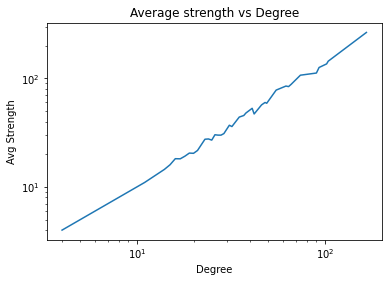

In [74]:
plt.loglog(plot['Degree'], plot['Strength'])
plt.title('Average strength vs Degree')
plt.xlabel('Degree')
plt.ylabel('Avg Strength')
plt.show()